In [8]:
import tensorflow as tf
import os

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
len(gpus)

0

In [11]:
os.listdir('Data')

['mines', 'rocks']

In [12]:
import cv2

In [14]:
pip install micropython-imghdr

Note: you may need to restart the kernel to use updated packages.


ERROR: micropython-imghdr from https://files.pythonhosted.org/packages/f4/ca/535824f3dcc5175084f0c3be67984e4a5681065e222ea79806decbf31892/micropython-imghdr-0.0.0.tar.gz does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [13]:
#import imghdr

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_25880\336752527.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [21]:
#data_dir = 'Data'

In [25]:
#for image_class in os.listdir(data_dir):
#    for image in os.listdir(os.path.join(data_dir,image_class)):
#        print(image)

02197_bmp.rf.27b0dd694ebf32c06150e3295f8e7fa5.jpg
02198_bmp.rf.9ece7ee7369eba65e3d2517621265306.jpg
02199_bmp.rf.611bca0826be18964a529cce0c24b85f.jpg
02201_bmp.rf.77a3699ee87a1b0f625105554ed52719.jpg
02202_bmp.rf.92f9dcb47c89a4d3521f2e7033309c9a.jpg
02203_bmp.rf.4aaf164296cf563787a935f78d817a7d.jpg
02204_bmp.rf.d2583cc0d78d15220d6e8c1378a6107c.jpg
02206_bmp.rf.236a90344a4dc6c65903300cd13372d3.jpg
02207_bmp.rf.a99415bf5c0d452a72e09f146e41fee3.jpg
02208_bmp.rf.e33e4090c9a65eae9b160f8291627b9d.jpg
02209_bmp.rf.dab44e5f2cd077cdd8c70af6068de284.jpg
02210_bmp.rf.14502b31e4443e68a7b3e5091fc711d9.jpg
02211_bmp.rf.b5d3f5cbe02db83ccfc55e30afacddcc.jpg
02212_bmp.rf.257406372d1eb4b9b423436ec082e8d2.jpg
02213_bmp.rf.0a8c76ea871a006f1bc2525036997cf9.jpg
02214_bmp.rf.3e3b10ff74f936804139205efeacad16.jpg
02215_bmp.rf.6d081c4aa720377cf73fae708d9dfe1d.jpg
02217_bmp.rf.fcde5aa915072cc4a9670e131375ac79.jpg
02218_bmp.rf.f6f1e4096384f94bd9992c50b9ac8b14.jpg
02219_bmp.rf.c2d9b3228fd648318ed98e343e618025.jpg


In [15]:
img = cv2.imread(os.path.join('Data','mines', '02201_bmp.rf.77a3699ee87a1b0f625105554ed52719.jpg'))

In [16]:
img.shape

(1745, 1024, 3)

In [17]:
from matplotlib import pyplot as plt

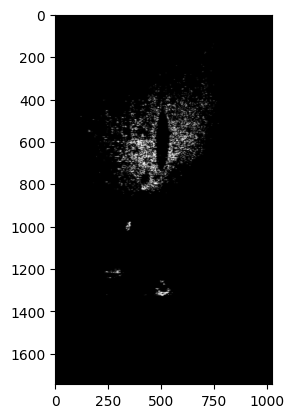

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [19]:
import numpy as np

In [20]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 198 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
data_iterator

In [23]:
#to iterate to the next batch of the image
batch = data_iterator.next()

In [24]:
len(batch)

2

In [25]:
batch[0].shape

(32, 256, 256, 3)

In [26]:
# 1 is ROCK
# 0 is MINE

batch[1] 

#batch[0] is the actual image
#batch[1] is the index assigned to it

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

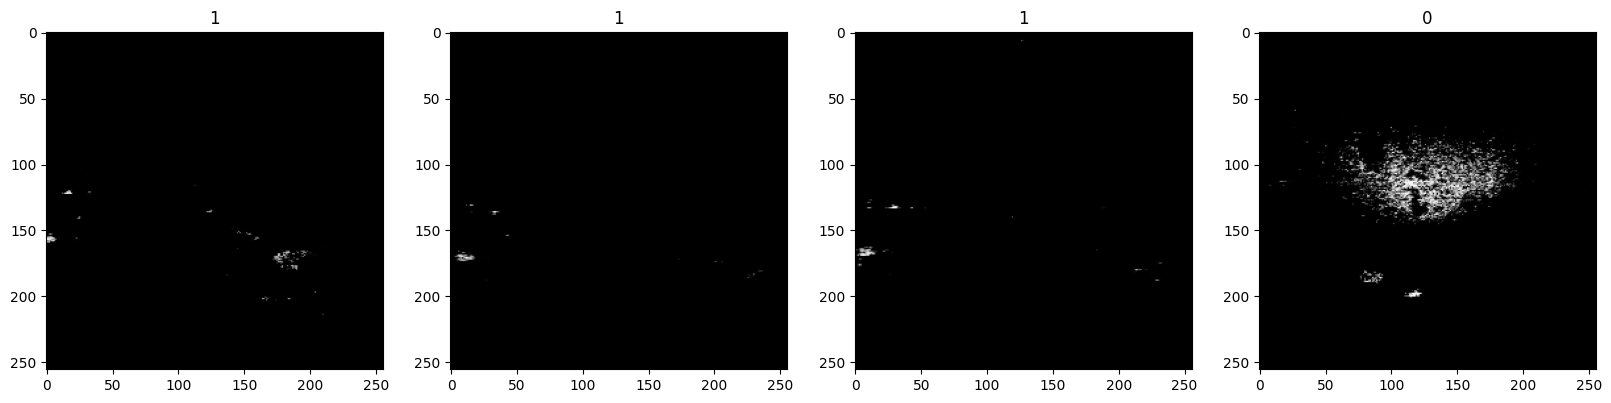

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

255.0

In [28]:
#scaling data
data = data.map(lambda x, y : (x/255 , y))

In [29]:
data.as_numpy_iterator().next()[0].max()

1.0

In [30]:
len(data)

7

In [31]:
#spliting data
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [32]:
#equilizing the number of batches
test_size + train_size + val_size

7

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(train)

4

In [35]:
#Deep model

In [36]:
logdir = 'logs'

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D, Dense

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [42]:
#Train

logdir = 'logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 894ms/step - loss: 0.3789 - accuracy: 0.8359 - val_loss: 0.1130 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 3s 722ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9844
Epoch 3/20
4/4 [==============================] - 3s 747ms/step - loss: 0.0695 - accuracy: 0.9922 - val_loss: 5.3316e-06 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 3s 771ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 6.2894e-05 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 3s 745ms/step - loss: 2.9429e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 3s 740ms/step - loss: 0.0173 - accuracy: 0.9922 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 3s 739ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 4.3169e-04 - val_accuracy: 1.0000
Epoc

In [45]:
hist.history

{'loss': [0.37885594367980957,
  0.05673741549253464,
  0.06951764225959778,
  0.004878778010606766,
  0.00029429365531541407,
  0.017309388145804405,
  0.004815541207790375,
  0.000403518439270556,
  1.7820391803979874e-05,
  1.6754705711718998e-06,
  3.639927683707356e-07,
  1.4649621959961223e-07,
  5.6055924346765096e-08,
  1.0993353782851045e-07,
  7.949877556256979e-08,
  6.966812549080714e-08,
  5.7949570475557266e-08,
  2.3509395319365467e-08,
  5.360215737937324e-08,
  2.380592434292339e-08],
 'accuracy': [0.8359375,
  1.0,
  0.9921875,
  1.0,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.11300858855247498,
  0.04936136677861214,
  5.331584816303803e-06,
  6.28940761089325e-05,
  0.0044925631955266,
  0.016879357397556305,
  0.00043169298442080617,
  1.4564267985406332e-05,
  3.6434430512599647e-06,
  3.6063596553503885e-07,
  1.3774078411188384e-07,
  3.1374111131299287e-07,
  6.149500109

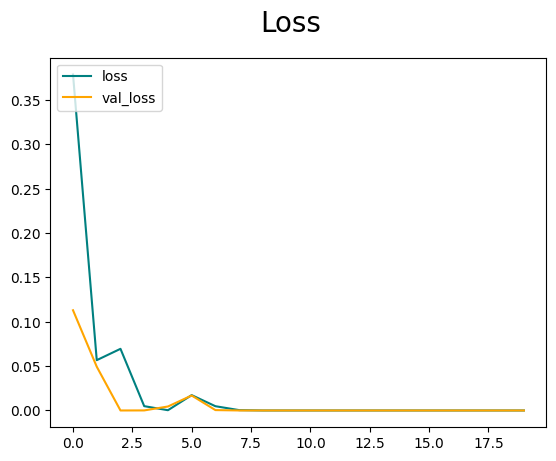

In [46]:
#Plotting accuracy and loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

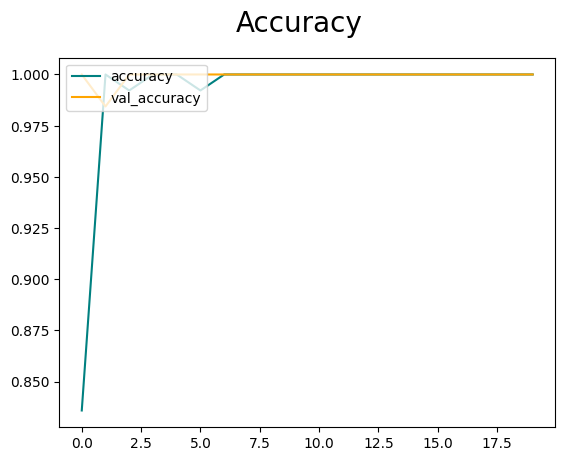

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [48]:
#Evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 175ms/step


In [51]:
print(f'precision: {pre.result().numpy()}, Result: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

precision: 1.0, Result: 1.0, Accuracy: 1.0


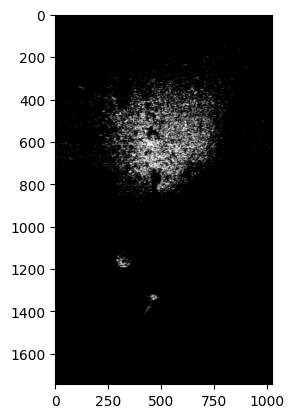

In [52]:
#Testing
img = cv2.imread('mine_test.jpg')
plt.imshow(img)
plt.show()

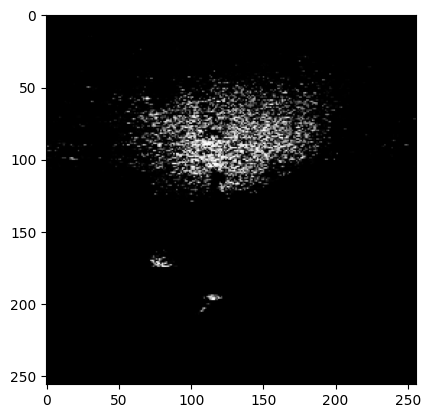

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
resize.shape

TensorShape([256, 256, 3])

In [55]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 79ms/step


In [57]:
yhat

array([[0.]], dtype=float32)

In [58]:
if yhat > 0.5:
    print('Rock')
else:
    print('Mine')

Mine


In [59]:
#saving model

from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','rockmine.h5'))

D:\Anaconda\envs\MachineLearning\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
new_model = load_model(os.path.join('models','rockmine.h5'))

In [62]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


array([[0.]], dtype=float32)

Saving our model

In [63]:
import pickle

In [64]:
filename = 'trained_model.sav'
pickle.dump(model , open(filename , 'wb'))

In [65]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [66]:
img = cv2.imread('mine_test.jpg')

resize = tf.image.resize(img, (256,256))

np.expand_dims(resize, 0)

yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5:
    print('Rock')
else:
    print('Mine')

1/1 [==============================] - 0s 79ms/step
Mine
